<h2><font color="#004D7F" size=6>Módulo 8. Aprenduzaje No Supervisado</font></h2>



<h1><font color="#004D7F" size=5>1. Algoritmos de clustering</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
* [2. Clustering](#section2)
* [3. Dataset](#section3)
* [4. Affinity Propagation](#section4)
* [5. Agglomerative Clustering](#section5)
* [6. BIRCH](#section6)
* [7. DBSCAN](#section7)
* [8. K-Means](#section8)
* [9. Mini-Batch K-Means](#section9)
* [10. Mean Shift](#section10)
* [11. OPTICS](#section11)
* [12. Spectral Clustering](#section12)
* [13. Gaussian Mixture Model](#section13)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción </font>


Clustering o el análisis de clustering es un problema de aprendizaje no supervisado (ULA, por sus siglas en inglés). A menudo se usa como una técnica de análisis de datos para descubrir patrones interesantes en los datos, como grupos de clientes en función de su comportamiento.

Hay muchos algoritmos de clustering para elegir y no existe el mejor algoritmo de clustering para todos los casos. En cambio, es una buena idea explorar una variedad de algoritmos de clustering y diferentes configuraciones para cada algoritmo. En este capítulo 
   * Clustering es un problema no supervisado que trata de encontrar grupos naturales en el espacio de características de los datos de entrada.
   * Hay muchos algoritmos de clustering diferentes y no hay un método único mejor para todos los conjuntos de datos.
   * Cómo implementar, ajustar y usar los mejores algoritmos de clustering en Python con la biblioteca de aprendizaje automático scikit-learn. 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Clustering</font>

La clustering implica descubrir automáticamente la agrupación natural en los datos. A diferencia del aprendizaje supervisado (como el modelado predictivo), los algoritmos de clustering solo interpretan los datos de entrada y encuentran grupos o agrupaciones naturales en el espacio de características. Por tanto, las técnicas de clustering se aplican cuando no hay una clase para predecir, sino cuando las instancias se dividen en grupos naturales.


Un grupo es a menudo un área de densidad en el espacio de características donde los ejemplos del dominio (observaciones o filas de datos) están más cerca del grupo que otros grupos. El grupo puede tener un centro (el centroide) que es una muestra o un espacio de entidades de puntos y puede tener un límite o extensión.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Dataset</font>

Utilizaremos la función `make_classification()` para crear un conjunto de datos de clasificación binaria de prueba.

El conjunto de datos tendrá 1,000 ejemplos, con dos características de entrada y un clúster por clase. Los grupos son visualmente obvios en dos dimensiones para que podamos trazar los datos con un diagrama de dispersión y colorear los puntos en el diagrama por el grupo asignado. Esto ayudará a ver, al menos en el problema de la prueba, qué tan bien se identificaron los grupos.

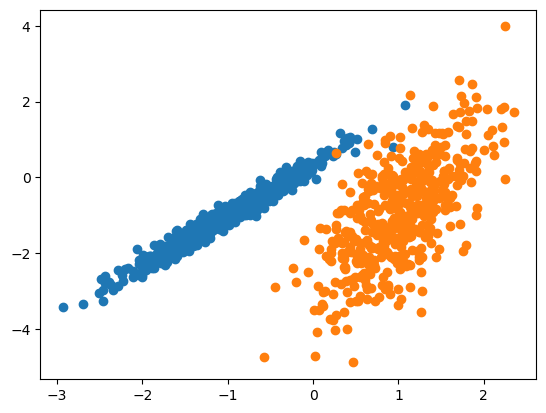

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=4)

for class_value in range(2):
    row_ix=np.where(y==class_value)
    pyplot.scatter(X[row_ix,0], X[row_ix,1])
pyplot.show()

Podemos ver claramente dos grupos distintos de datos en dos dimensiones y la esperanza sería que un algoritmo de agrupación automática pueda detectar estas agrupaciones

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la función [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Affinity Propagation</font>

Propagación de afinidad implica encontrar un conjunto de ejemplos que mejor resuman los datos. La configuración principal para ajustar es el conjunto de `dumping` entre 0.5 y 1, y tal vez `preference`.

En este caso, podemos observar que este algoritmo no pude lograr un buen resultado.
 

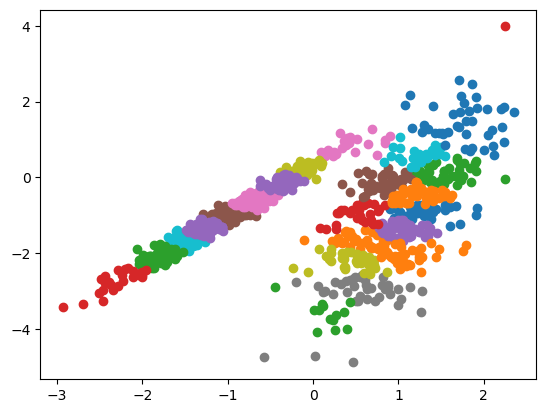

In [4]:
import numpy as np
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(damping=0.9)
model.fit(X)

yhat = model.predict(X)
#yhat
clusters = np.unique(yhat)

for cluster in clusters: 
    row_ix = np.where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix, 1])
pyplot.show()

In [8]:
### todo lo que termine en _ son las salidas del clusters
#model.affinity_matrix_
#model.cluster_centers_
#model.cluster_centers_indices_
model.labels_

array([ 0, 11,  1, 11, 19,  9,  1, 15,  2,  2,  9,  5,  5,  9, 18,  9,  9,
        6,  5,  5, 14, 15,  7,  5, 19, 24,  0, 14,  1, 13,  8,  1, 13, 12,
        9, 22, 23,  5, 22, 18, 22,  5,  6, 24,  1, 21,  9, 21, 22,  5,  2,
        6, 19,  6, 15, 21, 19,  4,  8,  4, 23, 14,  4, 15,  6,  4,  7,  6,
       18,  4,  0, 14,  5, 14,  2, 11, 24, 11, 16,  4, 23, 22,  9,  4,  2,
        8, 20,  6,  9,  4,  6, 16,  8,  9, 21,  2,  6,  6,  5,  4, 16,  4,
       21, 18,  9, 10, 24,  5,  0,  7, 12,  9,  6, 14,  0,  9,  9, 14, 14,
        4, 18, 19, 19, 24, 20,  8, 22, 10,  5, 12,  8,  8, 13,  8, 18,  5,
        9,  8, 23,  9,  7,  0, 13, 24,  6, 14,  6, 12,  3, 21, 21,  2, 11,
       24, 21, 13, 22, 15, 12, 19,  7, 19, 24,  0,  4, 16, 21,  5, 20,  0,
       21, 23, 11,  9, 10, 21, 22, 24, 14,  5,  0,  2, 13, 21, 13,  7, 19,
        0, 22, 21,  4, 24, 14, 14,  5, 18,  5,  4, 13, 11,  0,  7, 23,  5,
        0, 18,  9, 22, 21,  5,  5,  8, 14,  4, 21,  7, 15, 15,  7, 18,  4,
       18,  8, 19,  5, 18

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`AffinityPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html). 
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Artículo original [Clustering by Passing Messages Between Data Points](https://science.sciencemag.org/content/315/5814/972). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section5"></a>
# <font color="#004D7F"> 5. Agglomerative Clustering</font>

La agrupación aglomerativa implica fusionar ejemplos hasta que se alcanza el número deseado de agrupaciones.

En este caso, se encuentra una agrupación razonable.

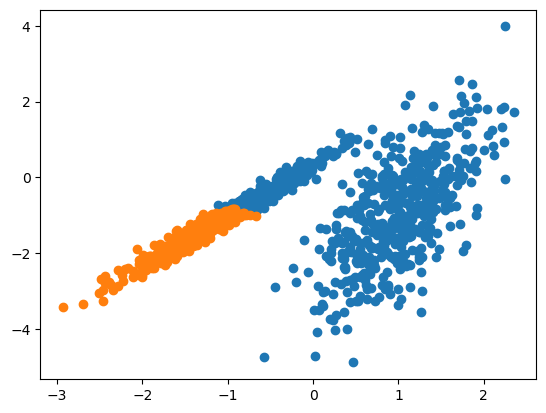

In [10]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()
yhat = model.fit_predict(X)
clusters = np.unique(yhat)

for cluster in clusters: 
    row_ix = np.where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix, 1])
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

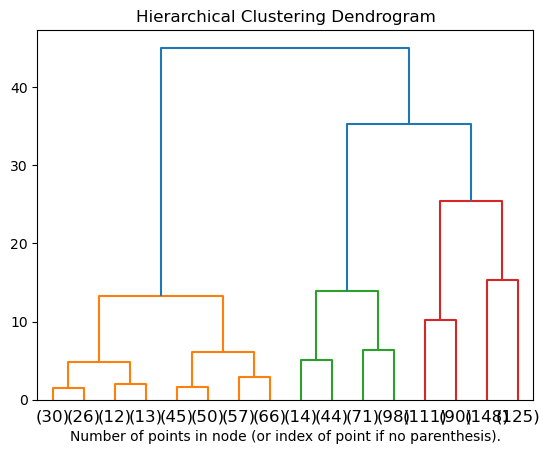

In [11]:
###### esto es sacado de la pagina de sklearn mediante estos datos 

import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

<a id="section6"></a>
# <font color="#004D7F"> 6. BIRCH</font>

BIRCH implica la construcción de una estructura de árbol a partir de la cual se extraen los centroides del clúster.

Se implementa a través de la clase `Birch` y la configuración principal para ajustar son los hiperparámetros `umbral` y `n_clusters`, el último de los cuales proporciona una estimación del número de clústeres.

En este caso, se encuentra una agrupación excelente.

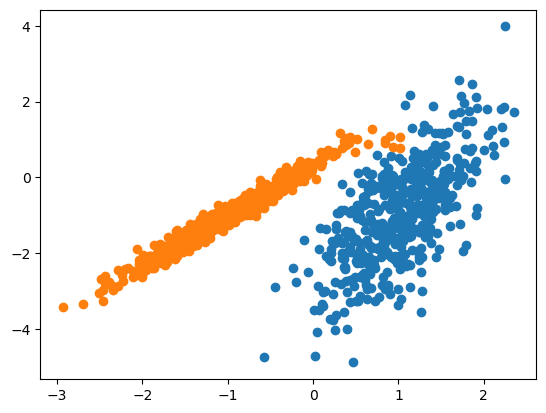

In [16]:
import numpy as np
from sklearn.cluster import Birch

model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)

yhat = model.predict(X)
clusters = np.unique(yhat)

for cluster in clusters: 
    row_ix = np.where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix, 1])
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`Birch`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html). 
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Artículo original [BIRCH: an efficient data clustering method for very large databases](https://dl.acm.org/doi/10.1145/235968.233324). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section7"></a>
# <font color="#004D7F"> 7. DBSCAN</font>

DBSCAN implica encontrar áreas de alta densidad en el dominio y expandir esas áreas del espacio de características a su alrededor como clústeres.

Se implementa a través de la clase [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) y la configuración principal para ajustar son los hiperparámetros `eps` y `min_samples`.

En este caso, se encuentra una agrupación razonable, aunque se requiere más ajuste.

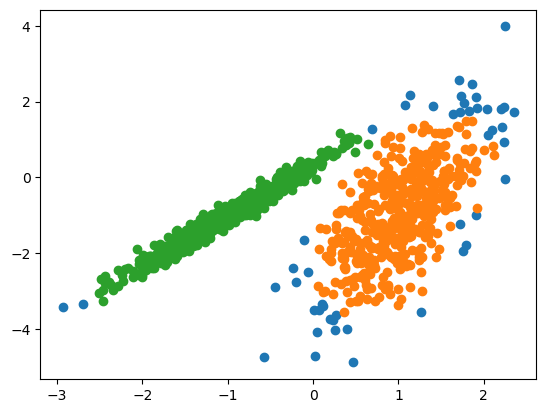

In [17]:
import numpy as np
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=9)

yhat = model.fit_predict(X)
clusters = np.unique(yhat)

for cluster in clusters: 
    row_ix = np.where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix, 1])
pyplot.show()

In [18]:
model.labels_

array([ 0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,
        1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  0,  1,  0,
        0,  1,  1, -1,  1,  1,  0,  0, -1,  1,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  0,  0,  1,  0,  0,  1, -1,  1, -1,  0,  0,  0,  0,  1,  1,
        1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1, -1, -1,  0,  0,  0,  0,
        1,  0,  0,  1,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  1,  0,  1, -1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0, -1,  0,  1,  1,
        0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0, -1,  0,  0,  0,  1,  0,
        1,  0,  0,  1,  1

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). 
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Artículo original [A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise](https://www.osti.gov/biblio/421283). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section8"></a>
# <font color="#004D7F"> 8. K-Means</font>

K-Means Clustering puede ser el algoritmo de agrupación más conocido e implica asignar ejemplos a los grupos en un esfuerzo por minimizar la variación dentro de cada grupo.

Se implementa a través de la clase `KMeans` y la configuración principal para ajustar es el hiperparámetro `n_clusters` establecido en el número estimado de clústeres en los datos.

En este caso, se encuentra una agrupación razonable, aunque la varianza desigual igual en cada dimensión hace que el método sea menos adecuado para este conjunto de datos.

C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


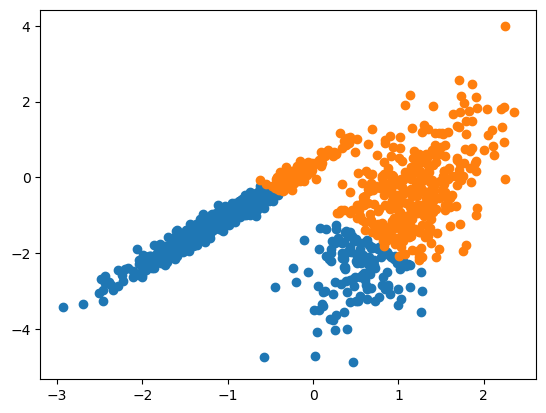

In [19]:
import numpy as np
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)

yhat = model.fit_predict(X)
clusters = np.unique(yhat)

for cluster in clusters: 
    row_ix = np.where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix, 1])
pyplot.show()

In [20]:
model.inertia_

1360.3559325566223

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Artículo original [Some methods for classification and analysis of multivariate observations](https://projecteuclid.org/euclid.bsmsp/1200512992). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section9"></a>
# <font color="#004D7F"> 9. Mini-Batch K-Means</font>

Mini-Batch K-Means es una versión modificada de k-means que realiza actualizaciones a los centroides del clúster utilizando mini-lotes de muestras en lugar de todo el conjunto de datos, lo que puede hacerlo más rápido para grandes conjuntos de datos y quizás más robusto al ruido estadístico.

Se implementa a través de la clase `MiniBatchKMeans` y la configuración principal para ajustar es el hiperparámetro `n_clusters` establecido en el número estimado de clústeres en los datos.

En este caso, se encuentra un resultado equivalente al algoritmo estándar k-means.

C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


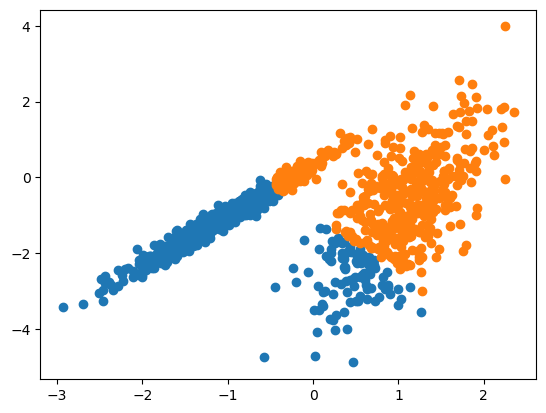

In [21]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=2)

yhat = model.fit_predict(X)
clusters = np.unique(yhat)

for cluster in clusters: 
    row_ix = np.where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix, 1])
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`MiniBatchKMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html). 
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Artículo original [Web-Scale K-Means Clustering](https://dl.acm.org/doi/10.1145/1772690.1772862). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section10"></a>
# <font color="#004D7F"> 10. Mean Shift</font>

La agrupación Mean Shift implica encontrar y adaptar los centroides en función de la densidad de ejemplos en el espacio de características.

Se implementa a través de la clase `MeanShift` y la configuración principal para ajustar es el hiperparámetro `bandwith`.

En este caso, se encuentra un conjunto razonable de clústeres en los datos.

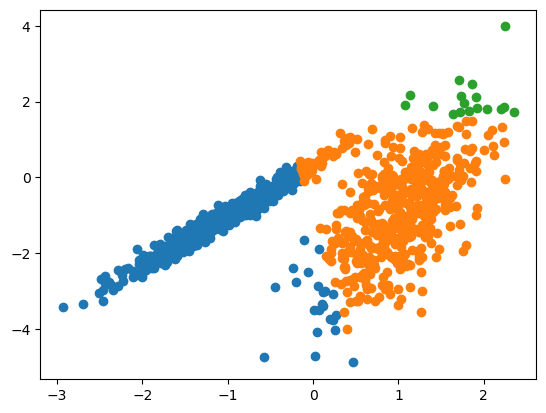

In [22]:
import numpy as np
from sklearn.cluster import MeanShift

model = MeanShift()

yhat = model.fit_predict(X)
clusters = np.unique(yhat)

for cluster in clusters: 
    row_ix = np.where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix, 1])
pyplot.show()

In [23]:
model.labels_

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0,

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`Mean Shift`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html). 
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Artículo original [ Mean Shift: A robust approach toward feature space analysis](https://www.computer.org/csdl/journal/tp/2002/05/i0603/13rRUxYrbVE). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section11"></a>
# <font color="#004D7F"> 11. OPTICS</font>

OPTICS es una versión modificada de DBSCAN.

Se implementa a través de la clase `OPTICS` y la configuración principal para ajustar son los hiperparámetros `eps` y `min_samples`.

En este caso, no pude lograr un resultado razonable en este conjunto de datos.

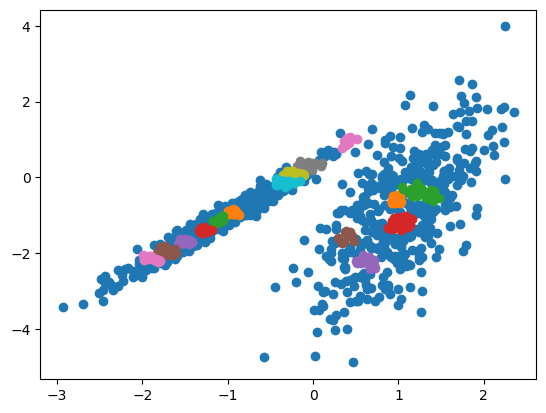

In [24]:
import numpy as np
from sklearn.cluster import OPTICS

model = OPTICS(eps=0.8, min_samples=10)

yhat = model.fit_predict(X)
clusters = np.unique(yhat)

for cluster in clusters: 
    row_ix = np.where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix, 1])
pyplot.show()

In [25]:
model.labels_

array([-1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10, 13,  7, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  8,  2, -1, -1, -1, -1,  4, -1, -1,
       13, 14, -1, 11, -1,  6, 15, -1, -1,  8, -1, -1, 13, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  9, -1, -1, -1,
        7, -1, -1, 12, 11, 12, -1, -1,  8, -1,  5, -1, -1, -1, 13, -1, -1,
        3, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,  2, -1,  2,
        1,  7, -1, -1, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, 12, 12,
        2,  7, -1, -1, -1, -1,  3, 15, -1, 10, -1,  3, -1, -1, -1,  6, -1,
       13,  3, -1, -1, -1, -1, -1, -1, -1, -1,  9, -1, -1,  0,  0, -1, -1,
       -1, -1, -1, 14, -1, -1, -1, -1, -1,  8, -1,  2, -1, -1, -1, -1,  2,
       -1, -1, -1, -1, -1,  1, -1,  8, 12, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, 12, 10,  6, -1,  2, -1, -1, -1, -1, -1, -1,
       -1,  7, -1, -1,  1, -1, -1, -1, -1,  2,  0, -1, -1, -1, -1,  6,  2,
        7,  3, -1, -1,  6

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`OPTICS`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html). 
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Artículo original [OPTICS: ordering points to identify the clustering structure](https://dl.acm.org/doi/10.1145/304182.304187). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section12"></a>
# <font color="#004D7F"> 12. Spectral Clustering</font>

Spectral Clustering es una clase general de métodos de agrupación, extraída del álgebra lineal.

Se implementa a través de la clase `SpectralClustering` y el principal Spectral Clustering es una clase general de métodos de agrupamiento, extraídos del álgebra lineal. El principal hiperparámetro es `n_clusters` utilizado para especificar el número estimado de clústeres en los datos.

En este caso, se encontraron grupos razonables.

C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


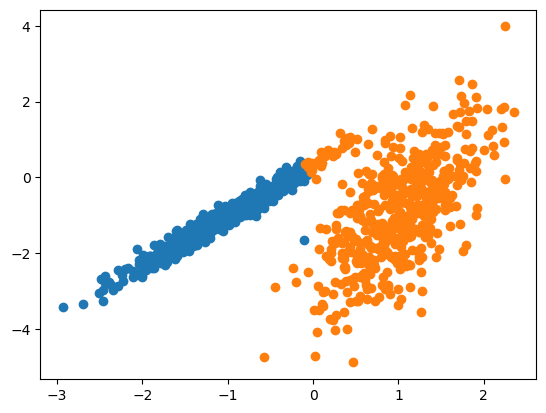

In [29]:
import numpy as np
from sklearn.cluster import SpectralClustering

# si no se pone n_clusters tomara la mejor decicion segun el algoretimos 
## pero no siempre es asi
model = SpectralClustering(n_clusters=2)

yhat = model.fit_predict(X)
clusters = np.unique(yhat)

for cluster in clusters: 
    row_ix = np.where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix, 1])
pyplot.show()

In [27]:
model.labels_

array([6, 6, 6, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 0, 0, 6, 0, 6, 6, 6, 6, 6, 3, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0,
       6, 0, 0, 6, 4, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 4, 0, 6, 0, 0, 6,
       5, 0, 0, 6, 6, 0, 0, 0, 0, 6, 0, 6, 0, 6, 4, 0, 0, 6, 0, 5, 0, 0,
       0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 2, 0, 0, 6, 5,
       3, 0, 0, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 6, 4, 2, 0, 3, 6, 6,
       6, 6, 0, 0, 0, 6, 4, 0, 5, 6, 6, 0, 0, 0, 0, 3, 7, 6, 0, 0, 6, 0,
       6, 6, 0, 0, 3, 0, 5, 0, 0, 6, 6, 0, 0, 0, 0, 6, 0, 4, 6, 0, 2, 0,
       4, 0, 0, 0, 6, 0, 6, 0, 6, 5, 0, 6, 4, 6, 6, 0, 0, 0, 0, 0, 0, 6,
       6, 6, 6, 5, 4, 0, 6, 0, 0, 0, 0, 0, 0, 5, 0, 6, 0, 5, 0, 0, 5, 0,
       6, 0, 6, 0, 0, 0, 0, 6, 6, 0, 5, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0,
       5, 0, 0, 0, 0, 0, 6, 4, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 4, 4, 0, 6,
       0, 0, 6, 5, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 6,
       0, 6, 0, 4, 0, 0, 6, 6, 0, 0, 0, 6, 0, 2, 0,

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`SpectralClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html). 
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Artículo original [On Spectral Clustering: Analysis and an algorithm](https://papers.nips.cc/paper/2092-on-spectral-clustering-analysis-and-an-algorithm.pdf). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section13"></a>
# <font color="#004D7F"> 13. Gaussian Mixture Model</font>

Un modelo de mezcla gaussiana resume una función de densidad de probabilidad multivariada con una mezcla de distribuciones de probabilidad gaussianas como su nombre indica.

Se implementa a través de la clase `GaussianMixture` y la configuración principal para ajustar es el hiperparámetro `n_clusters` utilizado para especificar el número estimado de clústeres en los datos.

En este caso, podemos ver que los grupos se identificaron perfectamente. Esto no es sorprendente dado que el conjunto de datos se generó como una mezcla de gaussianos.

C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


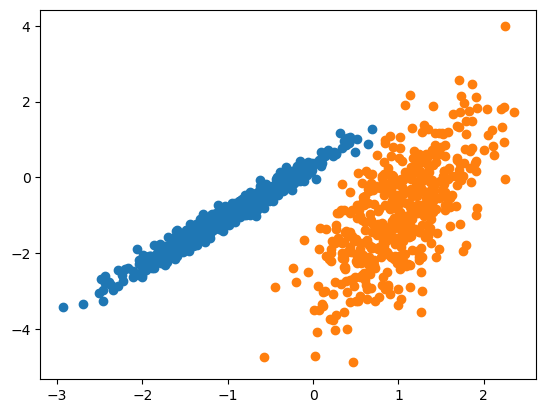

In [30]:
import numpy as np
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2)

yhat = model.fit_predict(X)
clusters = np.unique(yhat)

for cluster in clusters: 
    row_ix = np.where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix, 1])
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>